### DATA CLEANING


In [179]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from fancyimpute import KNN
warnings.filterwarnings('ignore')

In [180]:
# load your dataset into a pandas dataframe
df = pd.read_excel(r"C:\HOC\khoaluan\VN banks dataset (updated August 2022).xlsx", sheet_name= "Data")
df

,Bank Code,Year,Number of Employees,Number of Branches,Labour productivity,Network productivity,Employees Ratio,Branches Ratio,Total Deposits,Total Shareholder's Equity,...,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Off-balance Sheet Activities,Profits Before Tax,Profits After Tax
0,NaN,NaN,NE,NB,LPROD,NPROD,ERATIO,BRATIO,DEPOSITS,EQUITY,...,ROA,ROE,NIM,CIR,LTA,LTD,GTA,OBS,PBT,PAT
1,ABB,2005.0,94,NaN,87.553191,NaN,0.001387,NaN,209317,188076,...,1.210814,4.375891,6.863489,68.922299,39.94068,129.698018,4.38453,9445,11431,8230
2,ABB,2006.0,309,14,41.016181,905.285714,0.004281,0.003501,1551159,1190274,...,0.407014,1.064797,3.372963,75.997361,63.467204,127.408215,64.127534,508996,35287,12674
3,ABB,2007.0,1123,54,144.05699,2995.851852,0.011123,0.013012,6776279,2479200,...,0.941976,6.525331,3.168811,80.181379,59.601958,151.057977,-15.637631,526026,230793,161776
4,ABB,2008.0,1345,70,36.948699,709.942857,0.010816,0.000354,6673746,3955514,...,0.368279,1.256373,4.183087,95.808324,47.981036,97.016293,30.03161,3236046,65414,49696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,WEB,2008.0,404,61,245.960396,1628.983607,0.003249,0.000308,859372,1101678,...,3.725179,9.019695,13.718481,47.946461,44.64603,138.580149,34.219728,NaN,138059,99368
628,WEB,2009.0,594,71,201.180135,1683.112676,0.004291,0.000353,3309044,1136828,...,1.157908,10.511792,1.948003,66.647576,81.491402,254.159661,-34.946482,NaN,160149,119501
629,WEB,2010.0,763,71,66.952818,719.507042,0.004957,0.000342,5593260,1993434,...,0.545493,2.562663,3.783109,91.458874,56.103623,93.935648,20.491398,NaN,67373,51085
630,WEB,2011.0,874,76,138.169336,1588.947368,0.005051,0.004121,12629595,3162784,...,0.796281,3.818155,8.1131,92.201092,33.554827,40.292329,61.685673,NaN,160559,120760


In [181]:
# extract the first row and store it in a variable called "header_name"
header_name = df.iloc[0]

# remove the first row from the DataFrame
df = df.drop(0)

# reset the index after dropping the first row
df = df.reset_index(drop=True)

# Sort df by Year
df = df.sort_values('Year', ascending=True)

# convert the header_name pandas series to a dictionary
header_dict = header_name.to_dict()
# print the header_dict variable
print(header_dict)

{'Bank Code': nan, 'Year': nan, 'Number of Employees': 'NE', 'Number of Branches': 'NB', 'Labour productivity': 'LPROD', 'Network productivity': 'NPROD', 'Employees Ratio': 'ERATIO', 'Branches Ratio': 'BRATIO', 'Total Deposits': 'DEPOSITS', "Total Shareholder's Equity": 'EQUITY', 'Total Loans': 'LOANS', 'Loan Loss Provisions  ': 'LLP', 'Non-performing Loans  ': 'NPL', 'Total Fixed Assets': 'FASSETS', 'Liquid Assets': 'EASSETS', 'Total Assets': 'TASSETS', 'Total Deposits Ratio': 'DEPORATIO', 'Total Loans Ratio': 'LOANRATIO', 'Total Assets Ratio': 'ASSETRATIO', 'Interest Expenses': 'IE', 'Non-Interest Expenses': 'NIE', 'Personnel Expenses': 'PE', 'Occupancy Expenses': 'OE', 'Other Expenses': 'OTE', 'Total Operating Expenses': 'TOE', 'Core Cost': 'CC', 'Total Cost': 'TC', 'Core Cost Ratio': 'CCRATIO', 'Total Cost Ratio': 'TCRATIO', 'Interest Incomes': 'II', 'Non-Interest Income': 'NI', 'Other Incomes': 'OI', 'Total Income': 'TI', 'Total Income Ratio': 'TIRATIO', 'Equity Over Total Assets'

In [182]:
# Drop bank which is not a commercial bank
# Dropping rows where 'Bank Code' is equal to 'VBSP'
df = df[df["Bank Code"] != "VBSP"]
df

,Bank Code,Year,Number of Employees,Number of Branches,Labour productivity,Network productivity,Employees Ratio,Branches Ratio,Total Deposits,Total Shareholder's Equity,...,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Off-balance Sheet Activities,Profits Before Tax,Profits After Tax
37,AGB,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,42838237,-370195,...,-0.245424,60.710166,NaN,NaN,21.850577,46.709681,31.937059,NaN,NaN,-224746
57,BIDV,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,46114650,1658303,...,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,17370200,273733,27060
473,TCB,2002.0,377,14,14.169761,381.571429,0.081832,0.2,2024563,130978,...,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,1485052,5342,5342
546,VCB,2002.0,4185,41,53.449701,5455.780488,0.9084,0.585714,56422051,4397848,...,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,19110934,328951,223687
17,ACB,2002.0,NaN,13,NaN,9463.230769,NaN,0.185714,8297194,489452,...,1.315791,25.13464,4.376777,71.500404,56.533286,63.704308,78.886473,256492,164651,123022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,LVB,2021.0,10649,560,268.20246,5100.157143,0.043081,0.065131,180000000,17000000,...,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,78267371,3620859,2856088
600,VIB,2021.0,9895,166,647.776655,38612.951807,0.040031,0.019307,173564890,21290740,...,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,135278161,8011012,6409750
492,TCB,2021.0,12506,310,1471.193587,59350.796774,0.050593,0.036055,314752525,93055837,...,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,NaN,23238376,18398747
262,MB,2021.0,15910,301,830.869327,43917.378738,0.064364,0.035008,384692155,62486023,...,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.64968,NaN,16526705,13219131


In [183]:
# convert "Year" column to datetime and extract year from "Year" column
df["Year"] = pd.to_datetime(df["Year"], format='%Y').dt.year

# convert "Bank Code" column to categorical
df["Bank Code"] = pd.Categorical(df["Bank Code"])

# convert other columns to numerical
numerical_cols = [col for col in df.columns if col not in ['Year', 'Bank Code']]
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

In [184]:
len(numerical_cols)

46

In [185]:
# count the number of missing values in each column
missing_values = df.isnull().sum()

# print the missing_values variable
print(missing_values)

Bank Code                              0
Year                                   0
Number of Employees                  149
Number of Branches                   191
Labour productivity                  151
Network productivity                 193
Employees Ratio                      149
Branches Ratio                       191
Total Deposits                         0
Total Shareholder's Equity             0
Total Loans                            0
Loan Loss Provisions                  20
Non-performing Loans                  46
Total Fixed Assets                     0
Liquid Assets                          5
Total Assets                           4
Total Deposits Ratio                   0
Total Loans Ratio                      0
Total Assets Ratio                     4
Interest Expenses                      5
Non-Interest Expenses                  4
Personnel Expenses                   130
Occupancy Expenses                   135
Other Expenses                       128
Total Operating 

In [186]:
# calculate the total number of values
total_count = df["Bank Code"].count()
# calculate the percentage of missing values in each column
percent_missing = (missing_values / total_count) * 100

# print the percent_missing variable
print(percent_missing)


Bank Code                             0.000000
Year                                  0.000000
Number of Employees                  24.267101
Number of Branches                   31.107492
Labour productivity                  24.592834
Network productivity                 31.433225
Employees Ratio                      24.267101
Branches Ratio                       31.107492
Total Deposits                        0.000000
Total Shareholder's Equity            0.000000
Total Loans                           0.000000
Loan Loss Provisions                  3.257329
Non-performing Loans                  7.491857
Total Fixed Assets                    0.000000
Liquid Assets                         0.814332
Total Assets                          0.651466
Total Deposits Ratio                  0.000000
Total Loans Ratio                     0.000000
Total Assets Ratio                    0.651466
Interest Expenses                     0.814332
Non-Interest Expenses                 0.651466
Personnel Exp

In [187]:
# create a list of columns to drop (where missing value percentage > 9%)
cols_to_drop = percent_missing[percent_missing > 9].index.tolist()

# drop the columns from the dataframe
df = df.drop(cols_to_drop, axis=1)

# print the updated dataframe
df

,Bank Code,Year,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,Total Assets,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
37,AGB,2002,42838237,-370195,70278272,NaN,NaN,1286840,20009604.0,91574716.0,...,NaN,-0.245424,60.710166,NaN,NaN,21.850577,46.709681,31.937059,NaN,-224746.0
57,BIDV,2002,46114650,1658303,56050417,3530098.0,3530098.0,486077,14265217.0,70801711.0,...,6.298076,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,273733.0,27060.0
473,TCB,2002,2024563,130978,1896318,37857.0,96271.0,33352,2130154.0,4059824.0,...,1.996342,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5342.0,5342.0
546,VCB,2002,56422051,4397848,29295180,650476.0,1035645.0,296471,51904028.0,81495679.0,...,2.220420,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,328951.0,223687.0
17,ACB,2002,8297194,489452,3908156,13372.0,30634.0,155834,5285670.0,9349660.0,...,0.342156,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,164651.0,123022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,LVB,2021,180000000,17000000,210000000,3170702.0,2863454.0,1584457,78415543.0,290000000.0,...,1.509858,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,3620859.0,2856088.0
600,VIB,2021,173564890,21290740,201516754,2400324.0,4670158.0,604158,107396217.0,309517129.0,...,1.191129,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,8011012.0,6409750.0
492,TCB,2021,314752525,93055837,347341244,3735663.0,2293874.0,7224480,214245711.0,568811435.0,...,1.075502,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,23238376.0,18398747.0
262,MB,2021,384692155,62486023,363554778,8757684.0,3247806.0,4678447,247664878.0,615898103.0,...,2.408904,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.649680,16526705.0,13219131.0


<AxesSubplot:>

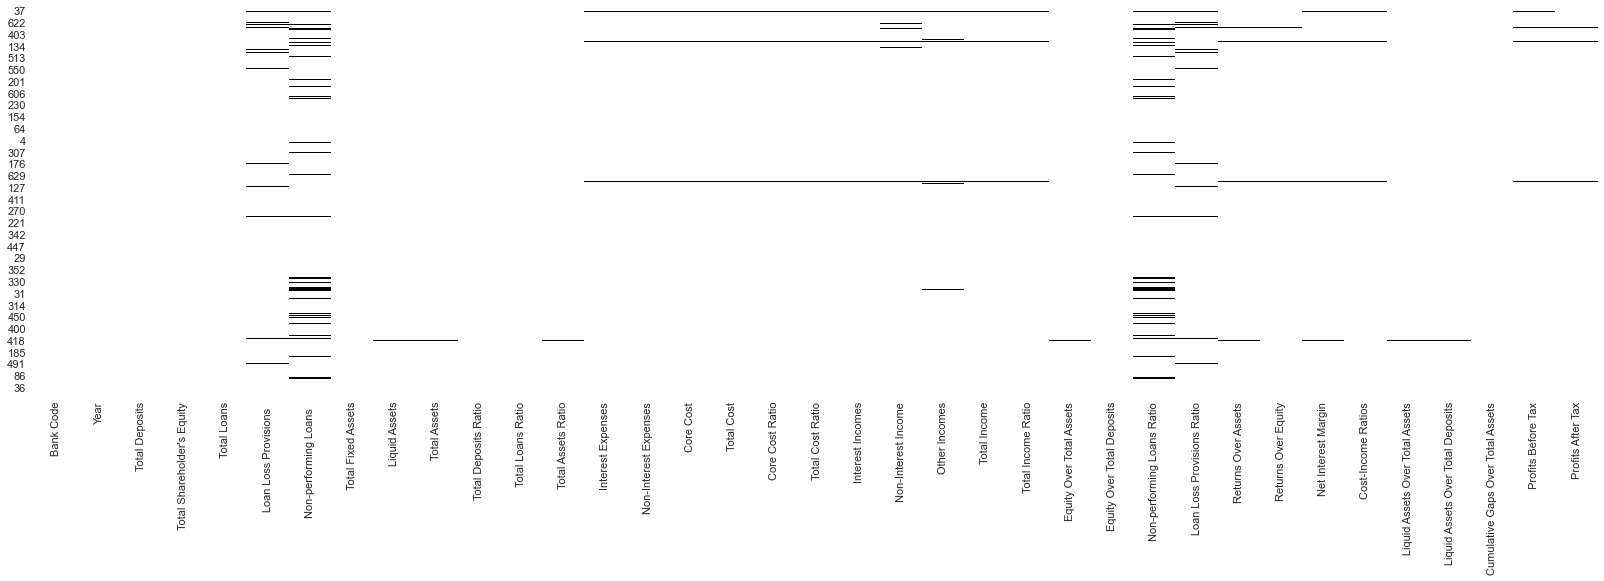

In [188]:
# set the size of the heatmap using the figsize parameter
sns.set(rc={'figure.figsize':(28,7)})
# create a heatmap using seaborn to visualize missing values
sns.heatmap(df.isnull(), cmap='binary', cbar=False)

In [189]:
# New column names updated
for col in cols_to_drop:
    header_dict.pop(col, None)
len(header_dict)

df

,Bank Code,Year,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,Total Assets,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
37,AGB,2002,42838237,-370195,70278272,NaN,NaN,1286840,20009604.0,91574716.0,...,NaN,-0.245424,60.710166,NaN,NaN,21.850577,46.709681,31.937059,NaN,-224746.0
57,BIDV,2002,46114650,1658303,56050417,3530098.0,3530098.0,486077,14265217.0,70801711.0,...,6.298076,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,273733.0,27060.0
473,TCB,2002,2024563,130978,1896318,37857.0,96271.0,33352,2130154.0,4059824.0,...,1.996342,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5342.0,5342.0
546,VCB,2002,56422051,4397848,29295180,650476.0,1035645.0,296471,51904028.0,81495679.0,...,2.220420,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,328951.0,223687.0
17,ACB,2002,8297194,489452,3908156,13372.0,30634.0,155834,5285670.0,9349660.0,...,0.342156,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,164651.0,123022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,LVB,2021,180000000,17000000,210000000,3170702.0,2863454.0,1584457,78415543.0,290000000.0,...,1.509858,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,3620859.0,2856088.0
600,VIB,2021,173564890,21290740,201516754,2400324.0,4670158.0,604158,107396217.0,309517129.0,...,1.191129,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,8011012.0,6409750.0
492,TCB,2021,314752525,93055837,347341244,3735663.0,2293874.0,7224480,214245711.0,568811435.0,...,1.075502,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,23238376.0,18398747.0
262,MB,2021,384692155,62486023,363554778,8757684.0,3247806.0,4678447,247664878.0,615898103.0,...,2.408904,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.649680,16526705.0,13219131.0


In [190]:
# Check for duplicates
duplicate_mask = df.duplicated()
duplicates = df[duplicate_mask]
print("Duplicate rows:")
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()

Duplicate rows:
Empty DataFrame
Columns: [Bank Code, Year, Total Deposits, Total Shareholder's Equity, Total Loans, Loan Loss Provisions  , Non-performing Loans  , Total Fixed Assets, Liquid Assets, Total Assets, Total Deposits Ratio, Total Loans Ratio, Total Assets Ratio, Interest Expenses, Non-Interest Expenses, Core Cost, Total Cost, Core Cost Ratio, Total Cost Ratio, Interest Incomes, Non-Interest Income, Other Incomes, Total Income, Total Income Ratio, Equity Over Total Assets, Equity Over Total Deposits, Non-performing Loans Ratio, Loan Loss Provisions Ratio, Returns Over Assets, Returns Over Equity, Net Interest Margin, Cost-Income Ratios, Liquid Assets Over Total Assets, Liquid Assets Over Total Deposits, Cumulative Gaps Over Total Assets, Profits Before Tax, Profits After Tax]
Index: []

[0 rows x 37 columns]


In [191]:
## Check zero value
zero_perc = (df == 0).sum() / len(df) * 100
zero_perc

Bank Code                            0.0
Year                                 0.0
Total Deposits                       0.0
Total Shareholder's Equity           0.0
Total Loans                          0.0
Loan Loss Provisions                 0.0
Non-performing Loans                 0.0
Total Fixed Assets                   0.0
Liquid Assets                        0.0
Total Assets                         0.0
Total Deposits Ratio                 0.0
Total Loans Ratio                    0.0
Total Assets Ratio                   0.0
Interest Expenses                    0.0
Non-Interest Expenses                0.0
Core Cost                            0.0
Total Cost                           0.0
Core Cost Ratio                      0.0
Total Cost Ratio                     0.0
Interest Incomes                     0.0
Non-Interest Income                  0.0
Other Incomes                        0.0
Total Income                         0.0
Total Income Ratio                   0.0
Equity Over Tota

In [192]:
df.reset_index(inplace= True)
df

,index,Bank Code,Year,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
0,37,AGB,2002,42838237,-370195,70278272,NaN,NaN,1286840,20009604.0,...,NaN,-0.245424,60.710166,NaN,NaN,21.850577,46.709681,31.937059,NaN,-224746.0
1,57,BIDV,2002,46114650,1658303,56050417,3530098.0,3530098.0,486077,14265217.0,...,6.298076,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,273733.0,27060.0
2,473,TCB,2002,2024563,130978,1896318,37857.0,96271.0,33352,2130154.0,...,1.996342,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5342.0,5342.0
3,546,VCB,2002,56422051,4397848,29295180,650476.0,1035645.0,296471,51904028.0,...,2.220420,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,328951.0,223687.0
4,17,ACB,2002,8297194,489452,3908156,13372.0,30634.0,155834,5285670.0,...,0.342156,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,164651.0,123022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,243,LVB,2021,180000000,17000000,210000000,3170702.0,2863454.0,1584457,78415543.0,...,1.509858,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,3620859.0,2856088.0
610,600,VIB,2021,173564890,21290740,201516754,2400324.0,4670158.0,604158,107396217.0,...,1.191129,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,8011012.0,6409750.0
611,492,TCB,2021,314752525,93055837,347341244,3735663.0,2293874.0,7224480,214245711.0,...,1.075502,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,23238376.0,18398747.0
612,262,MB,2021,384692155,62486023,363554778,8757684.0,3247806.0,4678447,247664878.0,...,2.408904,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.649680,16526705.0,13219131.0


In [193]:
# Get the first column name
first_col = df.columns[0]

# Move the first column to the third position
df.insert(3, "key", df[first_col])

# Drop the original first column
df = df.drop(columns=first_col)

# Print the updated DataFrame
df

,Bank Code,Year,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
0,AGB,2002,37,42838237,-370195,70278272,NaN,NaN,1286840,20009604.0,...,NaN,-0.245424,60.710166,NaN,NaN,21.850577,46.709681,31.937059,NaN,-224746.0
1,BIDV,2002,57,46114650,1658303,56050417,3530098.0,3530098.0,486077,14265217.0,...,6.298076,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,273733.0,27060.0
2,TCB,2002,473,2024563,130978,1896318,37857.0,96271.0,33352,2130154.0,...,1.996342,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5342.0,5342.0
3,VCB,2002,546,56422051,4397848,29295180,650476.0,1035645.0,296471,51904028.0,...,2.220420,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,328951.0,223687.0
4,ACB,2002,17,8297194,489452,3908156,13372.0,30634.0,155834,5285670.0,...,0.342156,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,164651.0,123022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LVB,2021,243,180000000,17000000,210000000,3170702.0,2863454.0,1584457,78415543.0,...,1.509858,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,3620859.0,2856088.0
610,VIB,2021,600,173564890,21290740,201516754,2400324.0,4670158.0,604158,107396217.0,...,1.191129,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,8011012.0,6409750.0
611,TCB,2021,492,314752525,93055837,347341244,3735663.0,2293874.0,7224480,214245711.0,...,1.075502,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,23238376.0,18398747.0
612,MB,2021,262,384692155,62486023,363554778,8757684.0,3247806.0,4678447,247664878.0,...,2.408904,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.649680,16526705.0,13219131.0


### Data Preprocessing


In [194]:
### Impute missing values
# define the number of neighbors to use for KNN imputation
n_neighbors = 5

# create KNN imputer object
knn_imputer = KNN(k=n_neighbors)

# impute the missing values in df
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df.iloc[:,2:]), columns=list(df.columns[2:]))

Imputing row 1/614 with 18 missing, elapsed time: 0.085
Imputing row 101/614 with 0 missing, elapsed time: 0.087
Imputing row 201/614 with 0 missing, elapsed time: 0.087
Imputing row 301/614 with 0 missing, elapsed time: 0.088
Imputing row 401/614 with 0 missing, elapsed time: 0.088
Imputing row 501/614 with 0 missing, elapsed time: 0.089
Imputing row 601/614 with 2 missing, elapsed time: 0.090


In [195]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   key                                614 non-null    float64
 1   Total Deposits                     614 non-null    float64
 2   Total Shareholder's Equity         614 non-null    float64
 3   Total Loans                        614 non-null    float64
 4   Loan Loss Provisions               614 non-null    float64
 5   Non-performing Loans               614 non-null    float64
 6   Total Fixed Assets                 614 non-null    float64
 7   Liquid Assets                      614 non-null    float64
 8   Total Assets                       614 non-null    float64
 9   Total Deposits Ratio               614 non-null    float64
 10  Total Loans Ratio                  614 non-null    float64
 11  Total Assets Ratio                 614 non-null    float64

In [196]:
df_imputed

,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,Total Assets,Total Deposits Ratio,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
0,37.0,42838237.0,-370195.0,70278272.0,2.982541e+06,1.039036e+07,1286840.0,20009604.0,91574716.0,0.209850,...,4.655262,-0.245424,60.710166,7.756831,95.328134,21.850577,46.709681,31.937059,2.153334e+05,-224746.0
1,57.0,46114650.0,1658303.0,56050417.0,3.530098e+06,3.530098e+06,486077.0,14265217.0,70801711.0,0.225900,...,6.298076,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,2.737330e+05,27060.0
2,473.0,2024563.0,130978.0,1896318.0,3.785700e+04,9.627100e+04,33352.0,2130154.0,4059824.0,0.009918,...,1.996342,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5.342000e+03,5342.0
3,546.0,56422051.0,4397848.0,29295180.0,6.504760e+05,1.035645e+06,296471.0,51904028.0,81495679.0,0.276393,...,2.220420,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,3.289510e+05,223687.0
4,17.0,8297194.0,489452.0,3908156.0,1.337200e+04,3.063400e+04,155834.0,5285670.0,9349660.0,0.040645,...,0.342156,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,1.646510e+05,123022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,243.0,180000000.0,17000000.0,210000000.0,3.170702e+06,2.863454e+06,1584457.0,78415543.0,290000000.0,0.021924,...,1.509858,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,3.620859e+06,2856088.0
610,600.0,173564890.0,21290740.0,201516754.0,2.400324e+06,4.670158e+06,604158.0,107396217.0,309517129.0,0.021140,...,1.191129,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,8.011012e+06,6409750.0
611,492.0,314752525.0,93055837.0,347341244.0,3.735663e+06,2.293874e+06,7224480.0,214245711.0,568811435.0,0.038337,...,1.075502,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,2.323838e+07,18398747.0
612,262.0,384692155.0,62486023.0,363554778.0,8.757684e+06,3.247806e+06,4678447.0,247664878.0,615898103.0,0.046856,...,2.408904,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.649680,1.652670e+07,13219131.0


In [197]:
df_name_year = df[["Bank Code", "Year","key"]]
df_final = df_name_year.merge(df_imputed, how="left")
# Check the resulting dataframe
df_final

,Bank Code,Year,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
0,AGB,2002,37,42838237.0,-370195.0,70278272.0,2.982541e+06,1.039036e+07,1286840.0,20009604.0,...,4.655262,-0.245424,60.710166,7.756831,95.328134,21.850577,46.709681,31.937059,2.153334e+05,-224746.0
1,BIDV,2002,57,46114650.0,1658303.0,56050417.0,3.530098e+06,3.530098e+06,486077.0,14265217.0,...,6.298076,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,2.737330e+05,27060.0
2,TCB,2002,473,2024563.0,130978.0,1896318.0,3.785700e+04,9.627100e+04,33352.0,2130154.0,...,1.996342,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5.342000e+03,5342.0
3,VCB,2002,546,56422051.0,4397848.0,29295180.0,6.504760e+05,1.035645e+06,296471.0,51904028.0,...,2.220420,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,3.289510e+05,223687.0
4,ACB,2002,17,8297194.0,489452.0,3908156.0,1.337200e+04,3.063400e+04,155834.0,5285670.0,...,0.342156,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,1.646510e+05,123022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LVB,2021,243,180000000.0,17000000.0,210000000.0,3.170702e+06,2.863454e+06,1584457.0,78415543.0,...,1.509858,0.984858,16.800518,11.477316,82.866024,27.039842,43.564191,61.588354,3.620859e+06,2856088.0
610,VIB,2021,600,173564890.0,21290740.0,201516754.0,2.400324e+06,4.670158e+06,604158.0,107396217.0,...,1.191129,2.070887,30.105811,11.002387,65.603036,34.697988,61.876695,16.278227,8.011012e+06,6409750.0
611,TCB,2021,492,314752525.0,93055837.0,347341244.0,3.735663e+06,2.293874e+06,7224480.0,214245711.0,...,1.075502,3.234595,19.771728,12.461679,51.194338,37.665507,68.067988,73.473452,2.323838e+07,18398747.0
612,MB,2021,262,384692155.0,62486023.0,363554778.0,8.757684e+06,3.247806e+06,4678447.0,247664878.0,...,2.408904,2.146318,21.155341,10.578407,66.990949,40.211989,64.380018,29.649680,1.652670e+07,13219131.0


In [198]:
df_final.columns

Index(['Bank Code', 'Year', 'key', 'Total Deposits',
       'Total Shareholder's Equity', 'Total Loans', 'Loan Loss Provisions  ',
       'Non-performing Loans  ', 'Total Fixed Assets', 'Liquid Assets',
       'Total Assets', 'Total Deposits Ratio', 'Total Loans Ratio',
       'Total Assets Ratio', 'Interest Expenses', 'Non-Interest Expenses',
       'Core Cost', 'Total Cost', 'Core Cost Ratio', 'Total Cost Ratio',
       'Interest Incomes', 'Non-Interest Income', 'Other Incomes',
       'Total Income', 'Total Income Ratio', 'Equity Over Total Assets',
       'Equity Over Total Deposits', 'Non-performing Loans Ratio',
       'Loan Loss Provisions Ratio', 'Returns Over Assets',
       'Returns Over Equity', 'Net Interest Margin', 'Cost-Income Ratios',
       'Liquid Assets Over Total Assets', 'Liquid Assets Over Total Deposits',
       'Cumulative Gaps Over Total Assets', 'Profits Before Tax',
       'Profits After Tax'],
      dtype='object')

In [199]:
df_final.describe()

,Year,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,Total Assets,...,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax
count,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02
mean,2012.042345,308.853420,1.102927e+08,1.102235e+07,9.950953e+07,1.614888e+06,1.868547e+06,1.472776e+06,5.477839e+07,1.557494e+08,...,1.323292,1.271594,10.924233,8.182063,78.873501,42.452290,79.107939,28.990523,2.040648e+06,1.660899e+06
std,5.049655,180.966892,2.081045e+08,1.653934e+07,1.938868e+08,3.562882e+06,3.804186e+06,2.329120e+06,7.794169e+07,2.679953e+08,...,1.952980,1.188598,38.321763,10.355512,33.206570,15.187628,53.427353,29.364845,3.899840e+06,3.273840e+06
min,2002.000000,0.000000,7.314000e+03,-3.701950e+05,5.072100e+04,-6.746460e+05,-4.637516e+06,7.690000e+02,2.378000e+03,5.386900e+04,...,-1.063731,-6.359490,-882.411702,-9.844170,-636.264509,1.865442,2.231210,-76.941803,-2.876656e+06,-3.398003e+06
25%,2008.000000,153.250000,9.289276e+06,2.353858e+06,9.238002e+06,7.692300e+04,1.076415e+05,1.723440e+05,7.676126e+06,1.757229e+07,...,0.828806,0.544783,5.913283,3.910783,72.055407,31.252404,44.901631,11.185167,1.580495e+05,1.208122e+05
50%,2012.000000,306.500000,3.787576e+07,4.392586e+06,2.917275e+07,3.430535e+05,4.733765e+05,5.754715e+05,2.713580e+07,6.205225e+07,...,1.118466,1.056056,11.797654,5.989689,82.535027,42.043215,67.314149,33.544459,5.674420e+05,4.804935e+05
75%,2016.000000,459.750000,1.083435e+08,1.255699e+07,8.805190e+07,1.201071e+06,1.679086e+06,1.400579e+06,6.890984e+07,1.630145e+08,...,1.550457,1.723301,17.165755,9.527854,91.044245,53.993839,95.315972,50.887667,2.240276e+06,1.785248e+06
max,2021.000000,630.000000,1.404876e+09,1.091174e+08,1.345633e+09,2.910372e+07,2.442882e+07,1.143653e+07,4.971453e+08,1.761696e+09,...,43.968633,7.977258,61.669185,158.583786,191.821572,86.190350,550.605537,86.725097,3.932015e+07,3.663401e+07


In [200]:
# Function used to calculate Overall CAMEL score
def Camel_scoring(df):
    # C
    df["C"] =pd.cut(df["Equity Over Total Assets"], 
                        bins=[-np.inf, 7, 8, 12, 15, np.inf], 
                        labels=[5, 4, 3, 2, 1])

    # A 
    df["A"] =  pd.cut((df_final['Non-performing Loans  ']/ df_final['Total Loans'])*100, 
                        bins=[-np.inf, 1.25, 2.5, 3.5, 5.5, np.inf], 
                        labels=[1, 2, 3, 4, 5])
    
    # M (Management Efficiency = Cost/Income)                                                                                                                                             
    df["M"] = pd.cut(df["Cost-Income Ratios"] , 
                        bins=[-np.inf, 25, 30, 38, 46, np.inf], 
                        labels=[1, 2, 3, 4, 5])  
    # E (Earning ability ROA, ROE)                                              
    df["E"] =  pd.cut(df["Returns Over Assets"], 
                        bins=[-np.inf, 0.75, 1, 1.25, 1.5, np.inf], 
                        labels=[5, 4, 3, 2, 1])
    
    # L (Liquidity = TL/TD)                                               
    df["L"] = pd.cut(df["Liquid Assets Over Total Assets"], 
                        bins=[-np.inf, 55, 62, 68, 81, np.inf], 
                        labels=[1, 2, 3, 4, 5])

    
    # convert other columns to numerical
    numerical_cols_score = ["C","A","M","E","L"]
    df[numerical_cols_score] = df[numerical_cols_score].apply(pd.to_numeric)
    # Calculate overall camel score
    df["Overall"] = (df["C"]+ df["A"]+ df["M"]+ df["E"] + df["L"]) / 5
    return df


In [201]:
Camel_scoring(df_final)

,Bank Code,Year,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,...,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax,C,A,M,E,L,Overall
0,AGB,2002,37,42838237.0,-370195.0,70278272.0,2.982541e+06,1.039036e+07,1286840.0,20009604.0,...,46.709681,31.937059,2.153334e+05,-224746.0,5,5,5,5,1,4.2
1,BIDV,2002,57,46114650.0,1658303.0,56050417.0,3.530098e+06,3.530098e+06,486077.0,14265217.0,...,30.934241,60.461667,2.737330e+05,27060.0,5,5,5,5,1,4.2
2,TCB,2002,473,2024563.0,130978.0,1896318.0,3.785700e+04,9.627100e+04,33352.0,2130154.0,...,105.215496,46.218506,5.342000e+03,5342.0,5,4,5,5,1,4.0
3,VCB,2002,546,56422051.0,4397848.0,29295180.0,6.504760e+05,1.035645e+06,296471.0,51904028.0,...,91.992452,55.087241,3.289510e+05,223687.0,5,4,5,5,3,4.4
4,ACB,2002,17,8297194.0,489452.0,3908156.0,1.337200e+04,3.063400e+04,155834.0,5285670.0,...,63.704308,78.886473,1.646510e+05,123022.0,5,1,5,2,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LVB,2021,243,180000000.0,17000000.0,210000000.0,3.170702e+06,2.863454e+06,1584457.0,78415543.0,...,43.564191,61.588354,3.620859e+06,2856088.0,5,2,5,4,1,3.4
610,VIB,2021,600,173564890.0,21290740.0,201516754.0,2.400324e+06,4.670158e+06,604158.0,107396217.0,...,61.876695,16.278227,8.011012e+06,6409750.0,5,2,5,1,1,2.8
611,TCB,2021,492,314752525.0,93055837.0,347341244.0,3.735663e+06,2.293874e+06,7224480.0,214245711.0,...,68.067988,73.473452,2.323838e+07,18398747.0,1,1,5,1,1,1.8
612,MB,2021,262,384692155.0,62486023.0,363554778.0,8.757684e+06,3.247806e+06,4678447.0,247664878.0,...,64.380018,29.649680,1.652670e+07,13219131.0,3,1,5,1,1,2.2


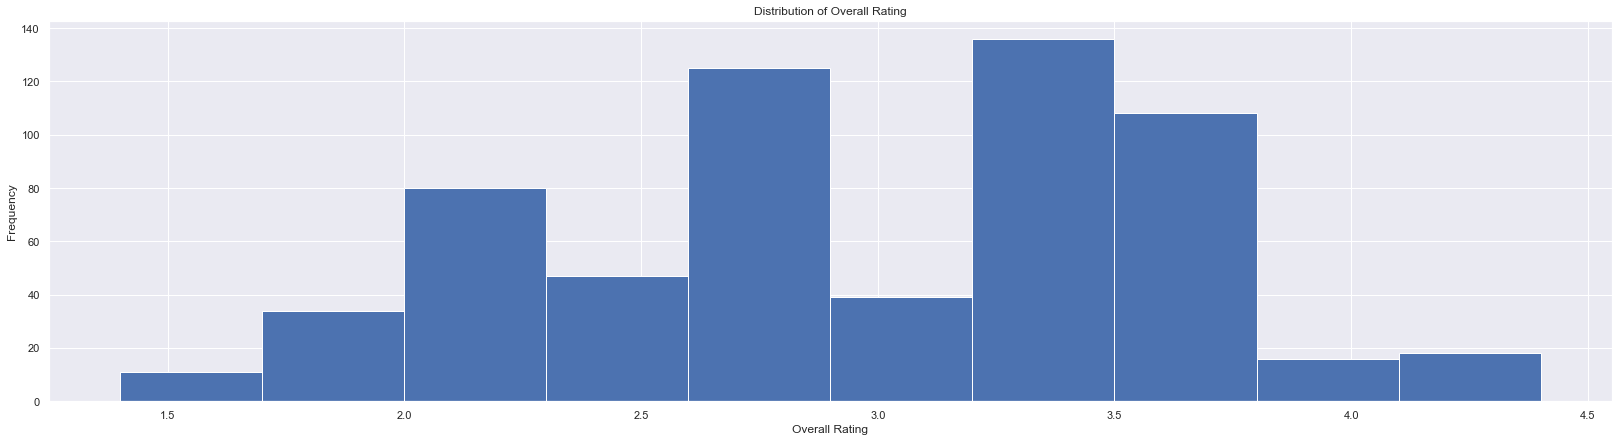

In [202]:
plt.hist(df_final["Overall"], bins=10)
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Overall Rating")
plt.show()

In [203]:
# create a new column "target" in camel_rating
df_final["Target"] = df_final["Overall"].apply(lambda x: 1 if x >= 3.4 else 0)

In [204]:
df_final["Target"].value_counts()

0    404
1    210
Name: Target, dtype: int64

In [205]:
df_final["C"].value_counts()

5    197
3    171
1    114
4     68
2     64
Name: C, dtype: int64

In [206]:
df_final["A"].value_counts()

2    242
1    229
3     87
4     35
5     21
Name: A, dtype: int64

In [207]:
df_final["M"].value_counts()

5    593
1      9
3      5
4      4
2      3
Name: M, dtype: int64

In [208]:
df_final["E"].value_counts()

5    221
1    196
4     77
2     65
3     55
Name: E, dtype: int64

In [209]:
df_final["L"].value_counts()

1    480
2     68
3     41
4     21
5      4
Name: L, dtype: int64

In [210]:
cols_to_remove = ["C","A","M","E","L","Overall"]
df_final = df_final.drop(columns=cols_to_remove)


In [211]:
# df_filtered = df_final[(df_final["Year"] == 2009) & (df_final["Target"] == 1)]
# df_filtered

In [212]:
df_final.head(20)

,Bank Code,Year,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,...,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax,Target
0,AGB,2002,37,42838237.0,-370195.0,70278272.0,2.982541e+06,1.039036e+07,1286840.0,20009604.0,...,-0.245424,60.710166,7.756831,95.328134,21.850577,46.709681,31.937059,215333.408308,-2.247460e+05,1
1,BIDV,2002,57,46114650.0,1658303.0,56050417.0,3.530098e+06,3.530098e+06,486077.0,14265217.0,...,0.038219,1.631789,9.996168,92.332643,20.148125,30.934241,60.461667,273733.000000,2.706000e+04,1
2,TCB,2002,473,2024563.0,130978.0,1896318.0,3.785700e+04,9.627100e+04,33352.0,2130154.0,...,0.131582,4.078548,3.165687,97.981523,52.469122,105.215496,46.218506,5342.000000,5.342000e+03,1
3,VCB,2002,546,56422051.0,4397848.0,29295180.0,6.504760e+05,1.035645e+06,296471.0,51904028.0,...,0.274477,5.086283,1.658307,89.910277,63.689301,91.992452,55.087241,328951.000000,2.236870e+05,1
4,ACB,2002,17,8297194.0,489452.0,3908156.0,1.337200e+04,3.063400e+04,155834.0,5285670.0,...,1.315791,25.134640,4.376777,71.500404,56.533286,63.704308,78.886473,164651.000000,1.230220e+05,0
5,CTG,2002,99,48432991.0,3173697.0,47120856.0,2.277310e+05,1.842138e+06,608424.0,20251132.0,...,0.257256,5.510419,7.246123,95.184929,29.789658,41.812681,59.533801,177884.000000,1.748840e+05,1
6,WEB,2002,620,7314.0,5607.0,50721.0,6.604714e+02,9.062998e+02,770.0,2378.0,...,0.579183,5.564473,86.248949,90.609656,4.414413,32.512989,19.378492,459.000000,3.120000e+02,0
7,HBB,2003,161,1448867.0,150968.0,1596105.0,1.097700e+04,1.097700e+04,15603.0,1074439.0,...,0.810343,14.418287,3.450731,85.284017,39.999263,74.157186,11.122846,27811.000000,2.176700e+04,0
8,AGB,2003,38,71912683.0,126135.0,99205174.0,7.693332e+06,7.116230e+05,1690980.0,21860437.0,...,-0.906697,-882.411702,17.842082,109.818593,17.807954,30.398584,30.677211,-686485.000000,-1.113030e+06,1
9,VPB,2003,601,1842884.0,208742.0,1508955.0,7.970000e+02,1.991820e+05,9715.0,973994.0,...,0.498756,5.359706,3.866040,100.000000,39.074420,52.851617,13.101221,24840.377774,1.403722e+04,1


In [213]:
# Create a Styler object for df
styler = df_final.describe().style

# Apply a color map to the Styler object
styler.background_gradient()

# Display the styled table
styler

,Year,key,Total Deposits,Total Shareholder's Equity,Total Loans,Loan Loss Provisions,Non-performing Loans,Total Fixed Assets,Liquid Assets,Total Assets,Total Deposits Ratio,Total Loans Ratio,Total Assets Ratio,Interest Expenses,Non-Interest Expenses,Core Cost,Total Cost,Core Cost Ratio,Total Cost Ratio,Interest Incomes,Non-Interest Income,Other Incomes,Total Income,Total Income Ratio,Equity Over Total Assets,Equity Over Total Deposits,Non-performing Loans Ratio,Loan Loss Provisions Ratio,Returns Over Assets,Returns Over Equity,Net Interest Margin,Cost-Income Ratios,Liquid Assets Over Total Assets,Liquid Assets Over Total Deposits,Cumulative Gaps Over Total Assets,Profits Before Tax,Profits After Tax,Target
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,2012.042345,308.853420,110292708.566775,11022348.956026,99509529.716612,1614887.513311,1868546.965948,1472775.853420,54778390.520814,155749405.301392,0.032545,0.031760,0.032134,6723030.666326,2670424.443575,8060043.575105,9393278.979500,0.032415,0.032300,11046882.792130,1736188.350906,-1347208.361203,11433850.606263,0.032329,11.163566,22.634626,2.004330,1.323292,1.271594,10.924233,8.182063,78.873501,42.452290,79.107939,28.990523,2040648.057691,1660899.194163,0.342020
std,5.049655,180.966892,208104521.105225,16539344.411628,193886756.064599,3562882.267247,3804186.246164,2329120.098921,77941689.790404,267995314.093746,0.052012,0.054604,0.048718,10620551.518175,4873128.851862,12982671.869577,15091957.935024,0.052216,0.052587,18002103.610609,3438363.649870,3425782.514591,18026609.084159,0.050133,8.349523,31.264812,2.576658,1.952980,1.188598,38.321763,10.355512,33.206570,15.187628,53.427353,29.364845,3899839.640957,3273839.521138,0.474773
min,2002.000000,0.000000,7314.000000,-370195.000000,50721.000000,-674646.000000,-4637516.000000,769.000000,2378.000000,53869.000000,0.000036,0.000135,0.000162,2474.000000,269.000000,3906.000000,4429.000000,0.000137,0.000178,5141.000000,-726039.000000,-29480917.000000,-5686.000000,-0.000124,-0.404255,-0.864170,-2.033595,-1.063731,-6.359490,-882.411702,-9.844170,-636.264509,1.865442,2.231210,-76.941803,-2876656.000000,-3398003.000000,0.000000
25%,2008.000000,153.250000,9289276.250000,2353857.750000,9238001.500000,76923.000000,107641.500000,172344.000000,7676125.750000,17572288.250000,0.005127,0.005077,0.005938,810415.500000,135218.750000,918373.250000,1020559.250000,0.005468,0.005486,1374581.500000,97415.500000,-883402.000000,1450702.000000,0.005912,6.412923,9.654858,0.904787,0.828806,0.544783,5.913283,3.910783,72.055407,31.252404,44.901631,11.185167,158049.500000,120812.250000,0.000000
50%,2012.000000,306.500000,37875765.000000,4392586.500000,29172747.000000,343053.500000,473376.500000,575471.500000,27135804.500000,62052254.500000,0.011950,0.010178,0.013683,2871970.000000,628174.000000,3253964.000000,3642215.500000,0.013068,0.012970,4108956.000000,362535.000000,-202605.500000,4392120.500000,0.013250,8.801417,14.264288,1.626185,1.118466,1.056056,11.797654,5.989689,82.535027,42.043215,67.314149,33.544459,567442.000000,480493.500000,0.000000
75%,2016.000000,459.750000,108343542.500000,12556992.250000,88051903.750000,1201070.750000,1679085.750000,1400579.250000,68909843.500000,163014521.500000,0.030383,0.028415,0.032149,7583546.250000,2570370.000000,8666160.500000,10241539.250000,0.032015,0.033117,11467059.250000,1578604.750000,-36227.000000,12433995.750000,0.034689,12.895638,23.165038,2.466477,1.550457,1.723301,17.165755,9.527854,91.044245,53.993839,95.315972,50.887667,2240276.000000,1785248.000000,1.000000
max,2021.000000,630.000000,1404875777.000000,109117393.000000,1345632643

In [214]:
df_final.columns

Index(['Bank Code', 'Year', 'key', 'Total Deposits',
       'Total Shareholder's Equity', 'Total Loans', 'Loan Loss Provisions  ',
       'Non-performing Loans  ', 'Total Fixed Assets', 'Liquid Assets',
       'Total Assets', 'Total Deposits Ratio', 'Total Loans Ratio',
       'Total Assets Ratio', 'Interest Expenses', 'Non-Interest Expenses',
       'Core Cost', 'Total Cost', 'Core Cost Ratio', 'Total Cost Ratio',
       'Interest Incomes', 'Non-Interest Income', 'Other Incomes',
       'Total Income', 'Total Income Ratio', 'Equity Over Total Assets',
       'Equity Over Total Deposits', 'Non-performing Loans Ratio',
       'Loan Loss Provisions Ratio', 'Returns Over Assets',
       'Returns Over Equity', 'Net Interest Margin', 'Cost-Income Ratios',
       'Liquid Assets Over Total Assets', 'Liquid Assets Over Total Deposits',
       'Cumulative Gaps Over Total Assets', 'Profits Before Tax',
       'Profits After Tax', 'Target'],
      dtype='object')

### Feature Selection

In [215]:
# Remove columns not use for predicting
cols_to_remove_2 = [ "Bank Code", "Year", "key",'Total Deposits','Total Fixed Assets','Other Incomes','Core Cost','Core Cost Ratio',
                      'Total Income','Interest Incomes', 'Non-Interest Income','Total Cost','Total Cost Ratio','Total Income Ratio',
                    'Equity Over Total Assets','Equity Over Total Deposits', "Total Shareholder's Equity", 'Liquid Assets','Total Assets',
                     'Non-performing Loans  ', 'Total Loans', 'Total Loans Ratio','Total Assets Ratio',
                      'Returns Over Assets','Interest Expenses',
                      'Returns Over Equity','Net Interest Margin','Cost-Income Ratios',
                        'Liquid Assets Over Total Assets','Liquid Assets Over Total Deposits', 'Profits After Tax', 'Non-performing Loans Ratio']
df_final = df_final.drop(columns=cols_to_remove_2)

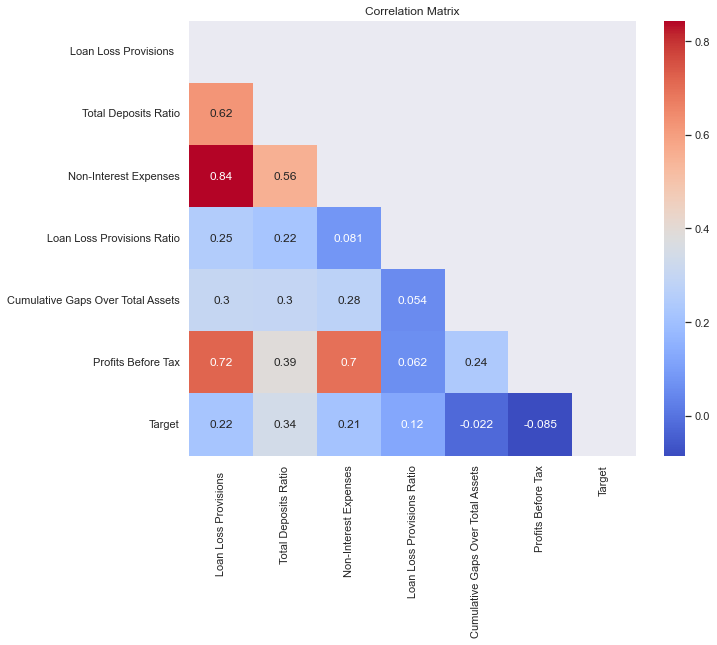

In [216]:
continuous_vars = []
for i in df.columns:
    if i == "Bank Code" or i == "Target":
        continue
    else:
        continuous_vars.append(i)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_final.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [217]:
correlation = df_final.corr().iloc[0:,-1].values
correlation

array([ 0.21931421,  0.34130046,  0.21033973,  0.12229389, -0.02246175,
       -0.08479345,  1.        ])

In [218]:
df_final.corr().iloc[0:,-1]

Loan Loss Provisions                 0.219314
Total Deposits Ratio                 0.341300
Non-Interest Expenses                0.210340
Loan Loss Provisions Ratio           0.122294
Cumulative Gaps Over Total Assets   -0.022462
Profits Before Tax                  -0.084793
Target                               1.000000
Name: Target, dtype: float64

In [219]:
column_selected = [x for x in df_final.columns if (x != 'Target')]
column_selected

features_importances_corr = pd.DataFrame({'FeatureName': df_final[column_selected].columns[0:len(df_final[column_selected])-1], 'Pearson Correlation with target': correlation[0:-1]})
features_importances_corr.reindex(features_importances_corr['Pearson Correlation with target'].abs().sort_values(ascending=False).index)

,FeatureName,Pearson Correlation with target
1,Total Deposits Ratio,0.341300
0,Loan Loss Provisions,0.219314
2,Non-Interest Expenses,0.210340
3,Loan Loss Provisions Ratio,0.122294
5,Profits Before Tax,-0.084793
4,Cumulative Gaps Over Total Assets,-0.022462


<AxesSubplot:ylabel='FeatureName'>

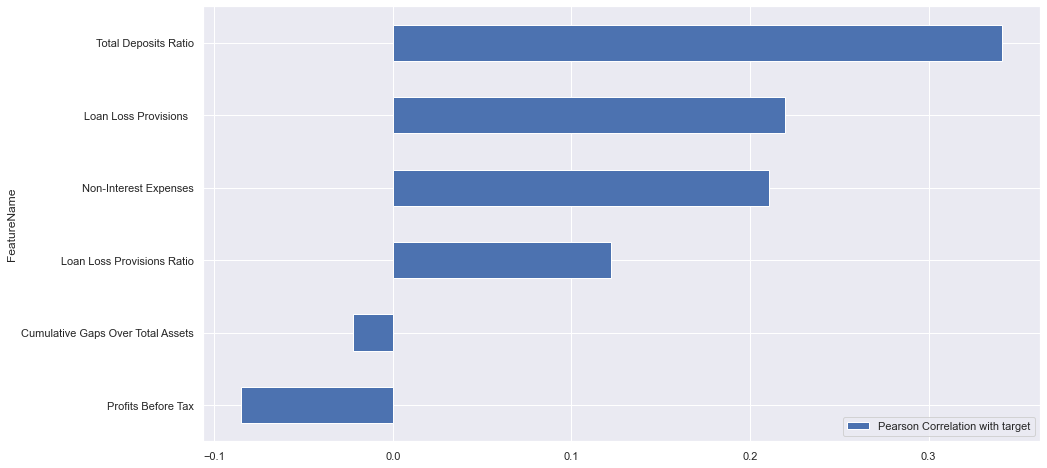

In [220]:
features_importances_corr.sort_values(by = ['Pearson Correlation with target']).plot(figsize=(15,8), x="FeatureName", y = "Pearson Correlation with target", kind="barh")

In [221]:
df_final.describe().to_csv('describe.csv', index=False)

In [222]:
# Define a function to replace outliers with 1st or 3rd quantile
def replace_outliers(df, q1=0.25, q3=0.75):
    """
    Replace outliers in a dataframe using the Interquartile Range (IQR) method.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing the data
    q1 : float
        The first quartile (default is 0.25)
    q3 : float
        The third quartile (default is 0.75)
        
    Returns:
    --------
    pandas.DataFrame
        Dataframe with outliers replaced with 1st or 3rd quantile
    """
    # Calculate the interquartile range (IQR) for each column
    q1_vals = df.quantile(q=q1)
    q3_vals = df.quantile(q=q3)
    iqr = q3_vals - q1_vals
    
    # Determine the upper and lower bounds for outliers
    lower_bound = (q1_vals - 1.5 * iqr)
    upper_bound = (q3_vals + 1.5 * iqr)
    
    # Replace outliers with the lower or upper bound
    for col in df.columns:
        df.loc[df[col] < lower_bound[col], col] = lower_bound[col]
        df.loc[df[col] > upper_bound[col], col] = upper_bound[col]
            
    return df

# Replace outliers using the IQR method
df_final = replace_outliers(df_final)


In [223]:
df_final

,Loan Loss Provisions,Total Deposits Ratio,Non-Interest Expenses,Loan Loss Provisions Ratio,Cumulative Gaps Over Total Assets,Profits Before Tax,Target
0,2887292.375,0.068268,9.287076e+05,2.632933,31.937059,2.153334e+05,1.0
1,2887292.375,0.068268,6.501660e+05,2.632933,60.461667,2.737330e+05,1.0
2,37857.000,0.009918,4.455200e+04,1.996342,46.218506,5.342000e+03,1.0
3,650476.000,0.068268,4.447170e+05,2.220420,55.087241,3.289510e+05,1.0
4,13372.000,0.040645,1.351380e+05,0.342156,78.886473,1.646510e+05,0.0
...,...,...,...,...,...,...,...
609,2887292.375,0.021924,5.511766e+06,1.509858,61.588354,3.620859e+06,1.0
610,2400324.000,0.021140,6.120005e+06,1.191129,16.278227,5.363616e+06,0.0
611,2887292.375,0.038337,6.223097e+06,1.075502,73.473452,5.363616e+06,0.0
612,2887292.375,0.046856,6.223097e+06,2.408904,29.649680,5.363616e+06,0.0


In [224]:
# export the DataFrame to CSV
df_final.to_csv('final_data.csv', index=False)